LASSO stands for "Least Absolute Shrinkage and Selection Operator".

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('diamonds.csv')
print(df.head())

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


In [5]:
X = df[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = df[['price']]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

where α>0 controls the weight of the added penalty term. Increasing α will decrese the slope b and it is actually allowed to become equal to zero. In ridge regression the slope only approaches, but never equals, zero.

In [10]:
alphas = [0.1,0.2,0.3,0.4,0.5,1,2,3,4,5,6,7,8]
scores = []
for alp in alphas:
    lasso = linear_model.Lasso(alpha=alp)
    lasso.fit(X_train, y_train)
    print(lasso.coef_.round(2))
    sc = lasso.score(X_test, y_test)  # =R^2
    scores.append(sc)
    print("alpha=",alp," lasso score:", sc)

[10561.29  -198.53  -100.89 -1481.66   272.52    58.67]
alpha= 0.1  lasso score: 0.8615203383830394
[10548.86  -196.14  -100.91 -1449.32   267.66    22.32]
alpha= 0.2  lasso score: 0.8615682320291203
[10535.48  -194.56  -100.92 -1423.18   260.75     0.  ]
alpha= 0.3  lasso score: 0.8616132009047861
[10522.45  -194.3   -100.91 -1408.7    251.64     0.  ]
alpha= 0.4  lasso score: 0.8616633895642147
[10509.76  -194.04  -100.9  -1394.57   242.75     0.  ]
alpha= 0.5  lasso score: 0.8617102478677708
[10444.78  -192.71  -100.84 -1323.39   198.33    -0.  ]
alpha= 1  lasso score: 0.861910447248714
[10313.86  -190.04  -100.73 -1180.73   109.61    -0.  ]
alpha= 2  lasso score: 0.8621457045236209
[10181.42  -187.31  -100.6  -1043.92    27.31    -0.  ]
alpha= 3  lasso score: 0.862157268211359
[10043.78  -184.25  -100.23  -959.4      0.      -0.  ]
alpha= 4  lasso score: 0.8620124327806014
[9906.94 -181.09  -99.75 -902.34    0.     -0.  ]
alpha= 5  lasso score: 0.8618377466753648
[9769.61 -177.93  

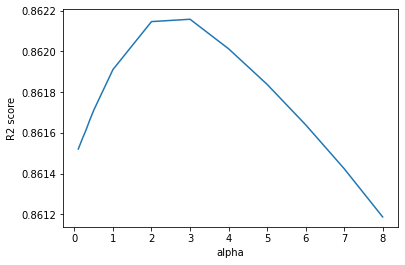

In [11]:
plt.plot(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("R2 score")
plt.show()